<a href="https://colab.research.google.com/github/mjh09/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

In [0]:
import pandas as pd

In [0]:
df_url = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', header=None)

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
# Load the dataset as a pandas dataframe
df_url = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', header=None)

In [0]:
# Making a copy
df = df_url.copy()

In [7]:
# Validate that there is the appropriate number of observations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
0    306 non-null int64
1    306 non-null int64
2    306 non-null int64
3    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [0]:
# From the raw file - 5. Number of Instances: 306

In [9]:
# Checking for missing values
df.isnull().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [11]:
# Another way to check values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
0    306 non-null int64
1    306 non-null int64
2    306 non-null int64
3    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [0]:
# Adding names to features
headers = ['op_age', 'op_year', 'pos_ax_nodes', 'surv_status']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', header=1, names=headers)

In [0]:
# Encoding 'survival status' as 0s and 1s
df['surv_status'] = df['surv_status'].apply(lambda x: 0 if x == 2 else 1)

In [15]:
# Printing the first five rows
print(df.head())

   op_age  op_year  pos_ax_nodes  surv_status
0      30       65             0            1
1      31       59             2            1
2      31       65             4            1
3      33       58            10            1
4      33       60             0            1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [0]:
# Making bins 
age_bin = pd.cut(df['op_age'], 4) # 0:[30-43], 1:[43:56], 2:[56:70], 3:[70:83] 
op_y_bin = pd.cut(df['op_year'], 4) # 0:[58:61], 1:[61:64], 2:[64:66], 3:[66:69]

In [0]:
# Creating a new feature for 'survived'
df['survived'] = df['surv_status'].apply(lambda x: True if x == 1 else False)

In [18]:
# Crosstab table to view numbers
pd.crosstab(age_bin, df['survived'])

survived,False,True
op_age,,
"(29.947, 43.25]",13,58
"(43.25, 56.5]",40,84
"(56.5, 69.75]",22,66
"(69.75, 83.0]",6,15


In [0]:
a_s = pd.crosstab(age_bin, df['survived'])

In [33]:
58/71

0.8169014084507042

In [35]:
84/124

0.6774193548387096

In [37]:
66/88

0.75

In [39]:
15/21

0.7142857142857143

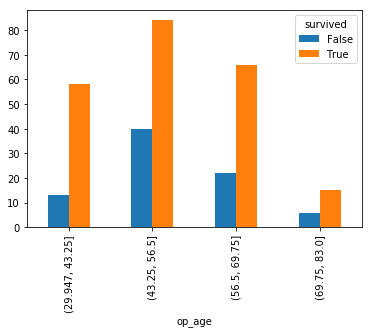

In [21]:
# Bar chart to visualize distribution
a_s.plot(kind='bar');

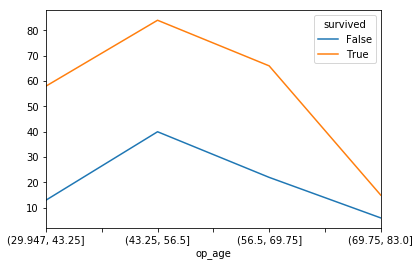

In [22]:
# Line plot
a_s.plot();

In [23]:
# 2nd table 
pd.crosstab(op_y_bin, df['survived'])

survived,False,True
op_year,,
"(57.989, 60.75]",25,66
"(60.75, 63.5]",18,60
"(63.5, 66.25]",27,59
"(66.25, 69.0]",11,38


In [41]:
66/91

0.7252747252747253

In [42]:
60/78

0.7692307692307693

In [44]:
59/86

0.686046511627907

In [46]:
38/49

0.7755102040816326

In [0]:
op_s = pd.crosstab(op_y_bin, df['survived'])

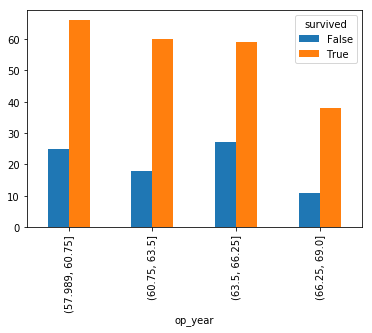

In [27]:
# 2nd bar chart
op_s.plot(kind='bar');

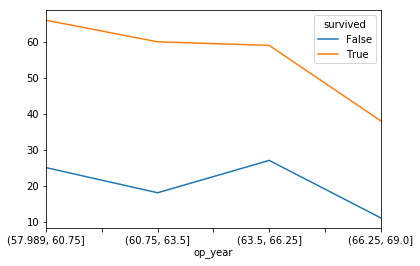

In [28]:
# 2nd line plot
op_s.plot();

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
 - It appears to me that the youngest age group bin has a positive relationship to survival. I'm making this assertion based on the observation that the group has the highest percentage of survival >5 years. But in general, as age increases, survival rate goes down, being negative. So maybe this answer and the next need to be swapped.
 
- What is at least one feature that looks to have a negative relationship with survival?
 -  Operation years between 64 and 66 seem to have a negative relationship to survival. I'm making this assumption based on the percentage of survived from that year bin being lower than the other three. But in general, as operation year increases, survival rate goes up, having a positive relationship. So maybe this answer needs to be swapped with the previous one.
 
 
- How are those two features related with each other, and what might that mean?
  - For age and operation year, the relationship appears to opposite? The younger a person is, the more likely they are to survive, but the later the operation year, at least for this time frame, the more likely they are to survive.

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.